In [8]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names 
target_names = iris.target_names

print(X.shape)
print(feature_names)
print(target_names)
print(X[:12])

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]]


(105, 4) (45, 4) (105,) (45,)


([<matplotlib.patches.Wedge at 0x2b875042410>,
 [Text(-0.9119413978702552, 0.6151120929151409, 'setosa'),
  Text(0.07673222354294301, -1.0973204481235899, 'versicolor'),
  Text(0.8668116711476608, 0.6772278248582229, 'virginica')],
 [Text(-0.4974225806565028, 0.3355156870446223, '31.1%'),
  Text(0.04185394011433254, -0.5985384262492308, '40.0%'),
  Text(0.47280636608054216, 0.36939699537721243, '28.9%')])

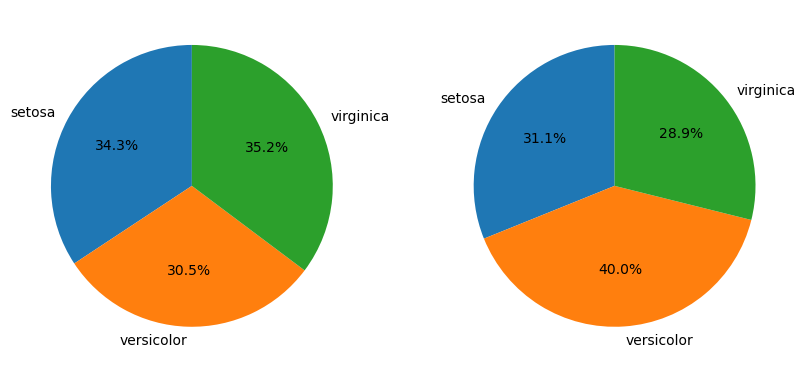

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
train_counts = pd.Series(y_train).value_counts().sort_index()
ax[0].pie(train_counts, labels=target_names, autopct='%1.1f%%', startangle=90)

test_counts = pd.Series(y_test).value_counts().sort_index()
ax[1].pie(test_counts, labels=target_names, autopct='%1.1f%%', startangle=90)

In [ ]:
from sklearn.linear_model import LogisticRegression 

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df = df[df['target'] < 2]
X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df['target'], test_size=0.3, random_state=1)

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)


1.0

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df['target'], test_size=0.3, random_state=1)

model = LogisticRegression()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(cm)
print(acc)

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
0.9777777777777777


In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=1)

model2 = LogisticRegression(max_iter = 1000)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
acc2 = accuracy_score(y_test, y_pred2)

print(cm2)
print(acc2)


[[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]
1.0


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

y = iris.data[:, 0]
X = iris.data[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(mse)


0.12421646742054557


[[ 0 50  0]
 [47  0  3]
 [14  0 36]]
0.24


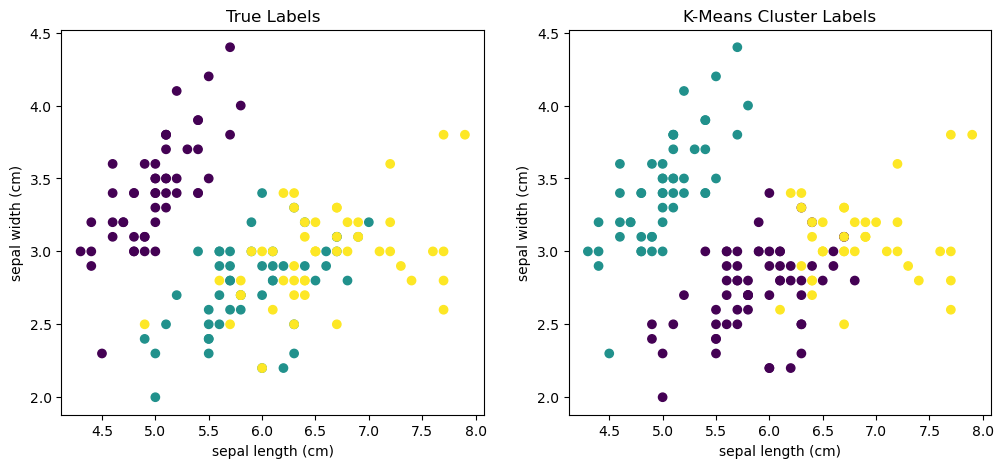

In [41]:
from sklearn.cluster import KMeans

X = iris.data
y = iris.target

kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)
labels = kmeans.labels_

cm = confusion_matrix(y, labels)
acc = accuracy_score(y, labels)

print(cm)
print(acc)  


#make scatter plots to show data points with true labels and data points with cluster labels)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('True Labels')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.subplot(1, 2, 2)

scatter2 = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Cluster Labels')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.show()

In [44]:
import numpy as np

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

loss = np.mean(y_pred != y_test)
acc = np.mean(y_pred == y_test)

print(loss)
print(acc)
print (loss + acc)

0.022222222222222223
0.9777777777777777
1.0


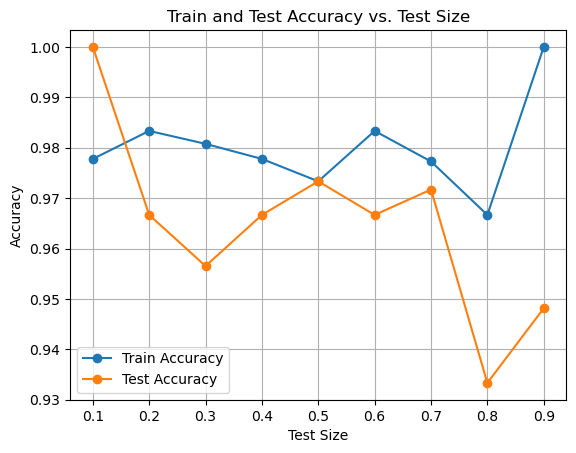

In [49]:
acc_list = []

for test_size in np.arange(0.1, 1.0, 0.1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

    model = LogisticRegression(max_iter = 1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    acc_list.append((train_acc, test_acc))

plt.plot(np.arange(0.1, 1.0, 0.1), [x[0] for x in acc_list], marker='o', label='Train Accuracy')
plt.plot(np.arange(0.1, 1.0, 0.1), [x[1] for x in acc_list], marker='o', label='Test Accuracy')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Test Size')
plt.legend()
plt.grid()
plt.show()

c:\Users\natha\.conda\envs\main_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\natha\.conda\envs\main_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


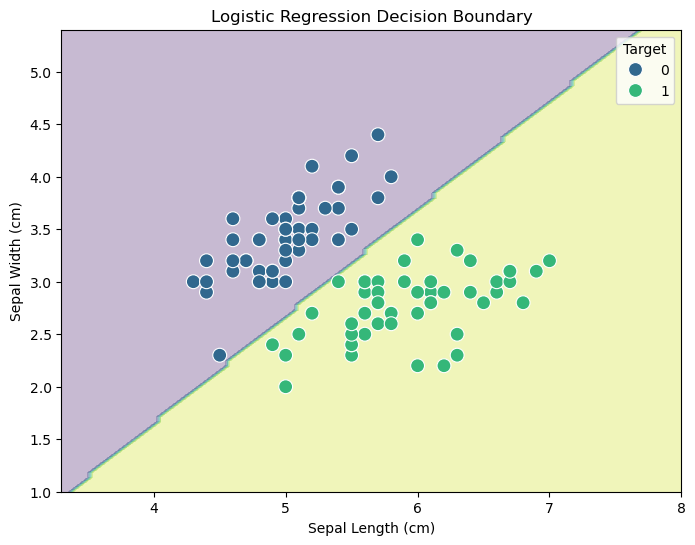

In [ ]:
X = iris.data
y = iris.target 

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df = df[df['target'] < 2]
df = df[['sepal length (cm)', 'sepal width (cm)', 'target']]

#I had to ask ChatGPT for how to do this meshgrid stuff and how to plot the boundary, 
#but I understand the concept well, just not the syntax

mesh_grid = np.meshgrid(
    np.linspace(df['sepal length (cm)'].min()-1, df['sepal length (cm)'].max()+1, 100),
    np.linspace(df['sepal width (cm)'].min()-1, df['sepal width (cm)'].max()+1, 100)
)

model = LogisticRegression()
model.fit(df[['sepal length (cm)', 'sepal width (cm)']], df['target'])
model.predict(np.c_[mesh_grid[0].ravel(), mesh_grid[1].ravel()]).reshape(mesh_grid[0].shape)

#Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(mesh_grid[0], mesh_grid[1], model.predict(np.c_[mesh_grid[0].ravel(), mesh_grid[1].ravel()]).reshape(mesh_grid[0].shape), alpha=0.3, cmap='viridis')
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette='viridis', s=100)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Logistic Regression Decision Boundary')
plt.legend(title='Target')
plt.show()


